In [6]:
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

COLUMN_WIDTH = 3.25  # Inches
TEXT_WIDTH = 6.299213  # Inches
GOLDEN_RATIO = 1.61803398875
DPI = 300
FONT_SIZE = 8

In [7]:
# load success rate
DATAPATH = '../output_from_datalab/active_learning'
FIGPATH = '../test'
NUM_RUNS = 100
DATASET_LIST = ['cifar100', 'svhn', 'imagenet', 'dbpedia', '20newsgroup', 'imagenet2_topimages'] 
# DATASET_LIST = ['20newsgroup']
METHOD_LIST = ['random', 'ts_uniform', 'ttts_uniform', 'ts_informed', 'ttts_informed', 'epsilon_greedy', 'bayesian_ucb']

def get_success_rate(metric, dataset, mode, method):
    pickle_filename = "%s/%s_%s_%s_%s_runs_%d.pkl" % (DATAPATH, dataset, metric, mode, method, NUM_RUNS)
    return pickle.load(open(pickle_filename, "rb"))

def get_figure_name(metric, mode):
    return "%s/%s_%s_runs_%d.pdf" % (FIGPATH, metric, mode, NUM_RUNS)

{'random': array([0., 0., 0., ..., 0., 0., 0.]), 'ts_uniform': array([0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ]), 'ttts_uniform': array([0., 0., 0., ..., 0., 0., 0.]), 'ts_informed': array([0.01, 0.02, 0.02, ..., 0.  , 0.  , 0.  ]), 'ttts_informed': array([0.03, 0.06, 0.04, ..., 0.  , 0.  , 0.  ]), 'epsilon_greedy': array([0., 0., 0., ..., 0., 0., 0.]), 'bayesian_ucb': array([0., 0., 0., ..., 0., 0., 0.])}
{'random': array([0.44, 0.43, 0.41, ..., 1.  , 1.  , 1.  ]), 'ts_uniform': array([0.37, 0.31, 0.34, ..., 1.  , 1.  , 1.  ]), 'ttts_uniform': array([0.36, 0.26, 0.26, ..., 1.  , 1.  , 1.  ]), 'ts_informed': array([1., 1., 1., ..., 1., 1., 1.]), 'ttts_informed': array([1., 1., 1., ..., 1., 1., 1.]), 'epsilon_greedy': array([0.42, 0.31, 0.31, ..., 1.  , 1.  , 1.  ]), 'bayesian_ucb': array([0.42, 0.31, 0.17, ..., 1.  , 1.  , 1.  ])}
{'random': array([0., 0., 0., ..., 1., 1., 1.]), 'ts_uniform': array([0.02, 0.02, 0.03, ..., 1.  , 1.  , 1.  ]), 'ttts_uniform': array([0.01, 0.01, 0.02, ...,

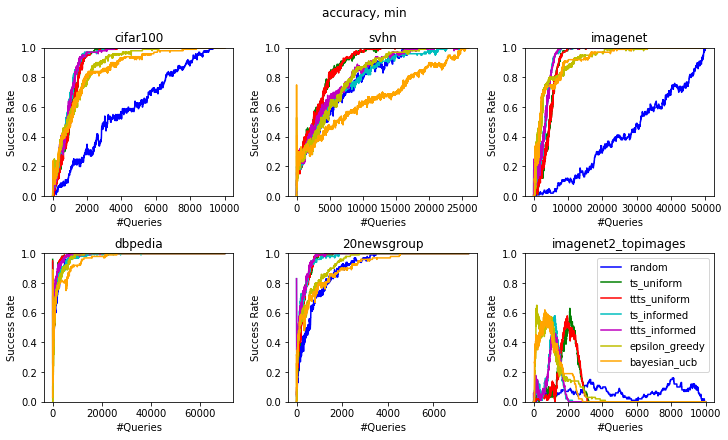

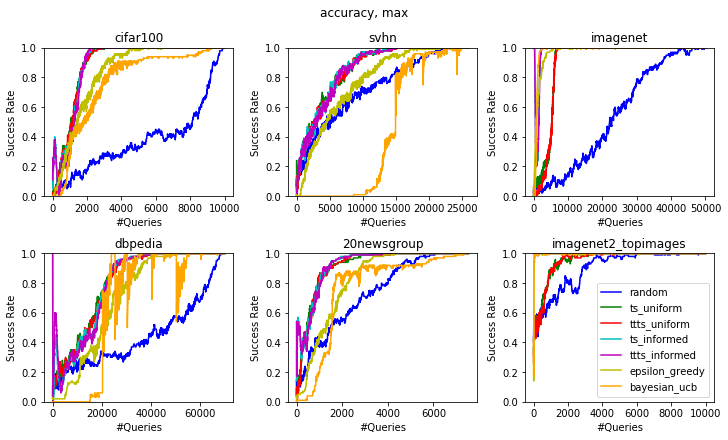

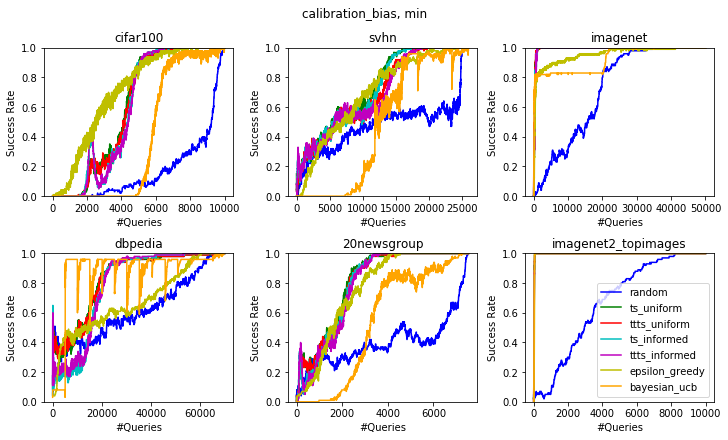

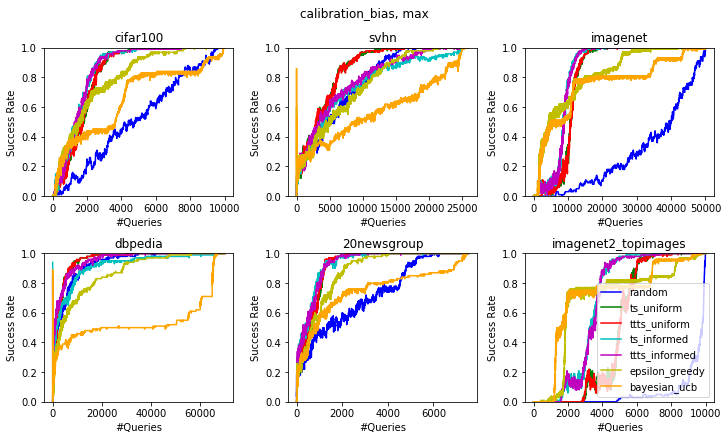

In [8]:
COLOR_LIST = ['b', 'g', 'r', 'c', 'm', 'y', 'orange']
    
for metric in ['accuracy', 'calibration_bias']:
    for mode in ['min', 'max']:
        fig, ax = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)
        for idx, dataset in enumerate(DATASET_LIST):
            # load results
            success_rate_dict = {}
            for method_idx, method_name in enumerate(METHOD_LIST):
                success_rate_dict[method_name] = get_success_rate(metric, dataset, mode, method_name)
                ax[idx//3, idx% 3].plot(success_rate_dict[method_name], 
                                        label=method_name, 
                                        color=COLOR_LIST[method_idx])
                if idx == 5:
                    ax[idx//3, idx% 3].legend()
            ax[idx//3, idx% 3].set_xlabel('#Queries')
            ax[idx//3, idx% 3].set_ylabel('Success Rate')
            ax[idx//3, idx% 3].set_ylim(0.0, 1.0)
            ax[idx//3, idx% 3].set_title('%s' % dataset)
        print(success_rate_dict)
        plt.suptitle("%s, %s" % (metric, mode))
        figname = get_figure_name(metric, mode)
        plt.savefig(figname)

In [9]:
dataset = 'CIFAR100'
metric = 'accuracy'
mode = 'min'
success_rate_dict = {}
for method in METHOD_LIST:
    success_rate_dict[method] = get_success_rate(metric, dataset, mode, method)
    count = min([i for i in range(success_rate_dict[method].shape[0]) if success_rate_dict[method][i] > 0.95])
    print('minimum number of samples to get 95% success rate:', count, 'for', method)
# plot
success_rate_dict

minimum number of samples to get 95% success rate: 8327 for random
minimum number of samples to get 95% success rate: 1918 for ts_uniform
minimum number of samples to get 95% success rate: 2088 for ttts_uniform
minimum number of samples to get 95% success rate: 1729 for ts_informed
minimum number of samples to get 95% success rate: 1921 for ttts_informed
minimum number of samples to get 95% success rate: 3511 for epsilon_greedy
minimum number of samples to get 95% success rate: 5207 for bayesian_ucb


{'random': array([0., 0., 0., ..., 1., 1., 1.]),
 'ts_uniform': array([0., 0., 0., ..., 1., 1., 1.]),
 'ttts_uniform': array([0., 0., 0., ..., 1., 1., 1.]),
 'ts_informed': array([0.01, 0.02, 0.03, ..., 1.  , 1.  , 1.  ]),
 'ttts_informed': array([0.  , 0.01, 0.02, ..., 1.  , 1.  , 1.  ]),
 'epsilon_greedy': array([0., 0., 0., ..., 1., 1., 1.]),
 'bayesian_ucb': array([0., 0., 0., ..., 1., 1., 1.])}